In [12]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil, sqrt
import matplotlib.colors as mcolors

In [4]:
list(range(ceil(sqrt(25))))

[0, 1, 2, 3, 4]

In [98]:
def is_prime(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    
    divisor_candidates = list(range(ceil(sqrt(n)+1)))
    
    for count in divisor_candidates[2:]:
        if n % count == 0: # If there is no remainder then it divided perfectly so n can't be prime
            return False
        
    return True

In [107]:
is_prime(25)

False

In [7]:
is_prime(1)

False

In [99]:
is_prime(2)

True

In [108]:
is_prime(7)

True

In [11]:
is_prime(123456789)

False

In [13]:
def display_colored_squares(grid_size, colors):
    fig, ax = plt.subplots()

    for i in range(grid_size):
        for j in range(grid_size):
            square_color = np.random.choice(colors)
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=square_color))

    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.show()

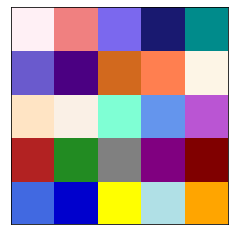

In [14]:
grid_size = 5  # Size of the grid (5x5)
colors = list(mcolors.CSS4_COLORS.values())  # All CSS4 colors

display_colored_squares(grid_size, colors)

In [16]:
def display_colored_squares(grid_height, grid_width, colors):
    fig, ax = plt.subplots(figsize=(20, 5))  # Adjusted for better aspect ratio

    for i in range(grid_height):
        for j in range(grid_width):
            square_color = np.random.choice(colors)
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=square_color))

    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)
    ax.set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.show()

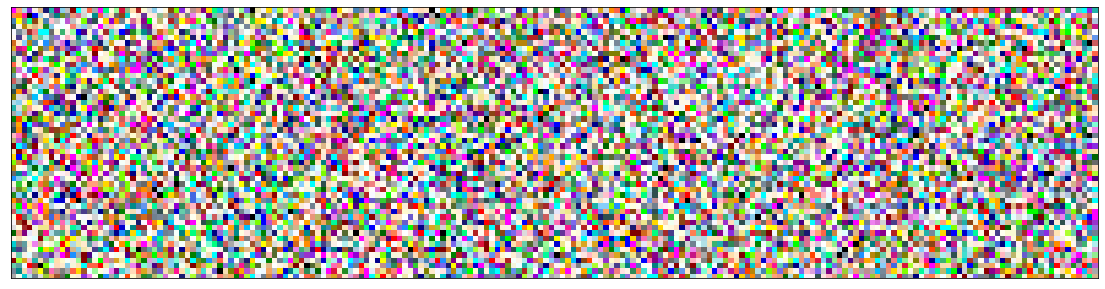

In [17]:
grid_height = 50  # Height of the grid
grid_width = 200  # Width of the grid
colors = list(mcolors.CSS4_COLORS.values())  # All CSS4 colors

display_colored_squares(grid_height, grid_width, colors)

In [18]:
def display_colored_squares(grid_height, grid_width):
    fig, ax = plt.subplots(figsize=(20, 5))  # Adjusted for better aspect ratio
    square_number = 1

    for i in range(grid_height):
        for j in range(grid_width):
            color = 'darkblue' if is_prime(square_number) else 'white'
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
            square_number += 1

    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)
    ax.set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.show()

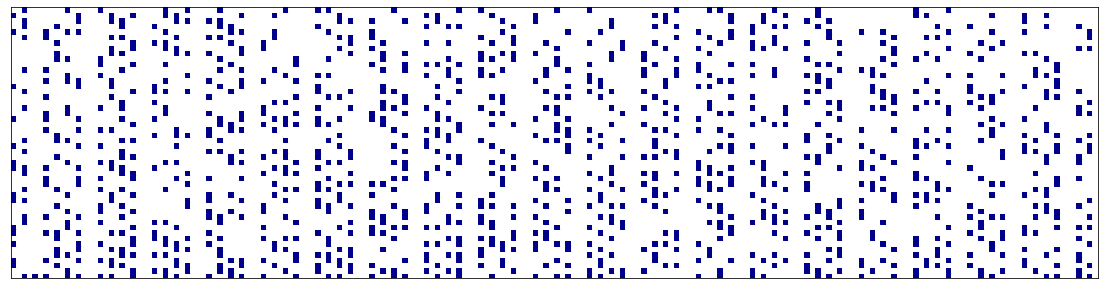

In [19]:
grid_height = 50  # Height of the grid
grid_width = 200  # Width of the grid

display_colored_squares(grid_height, grid_width)

In [50]:
def display_colored_squares(grid_height, grid_width):
    fig, ax = plt.subplots(figsize=(20, 5))  # Adjusted for better aspect ratio
    last_prime = 0  # Position of the last prime number

    for i in range(grid_height):
        for j in range(grid_width):
            square_number = i * grid_width + j + 1
            if is_prime(square_number):
                last_prime = square_number
            gap_since_last_prime = square_number - last_prime

            if square_number == 1:
                color = 'yellow'
            elif square_number == 2:
                color = 'darkblue'
            elif gap_since_last_prime == 0:
                color = 'darkblue'  # Primes themselves will be dark blue
            elif gap_since_last_prime == 1:
                color = 'blue'
            elif gap_since_last_prime == 2:
                color = 'lightblue'
            else:
                color = 'white'

            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)
    ax.set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.show()

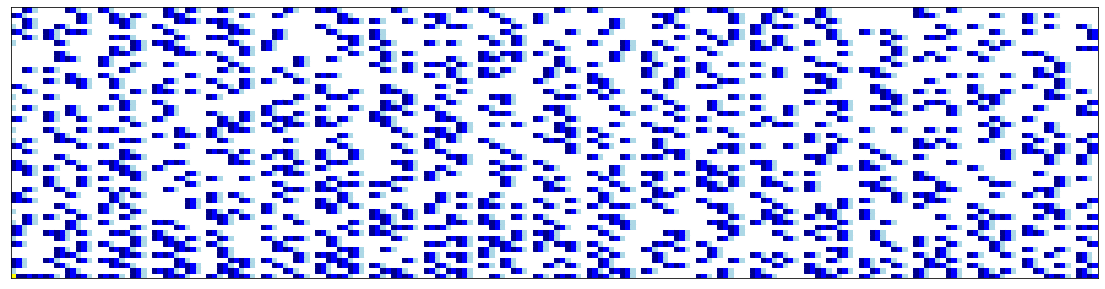

In [53]:
grid_height = 50  # Height of the grid
grid_width = 200  # Width of the grid

display_colored_squares(grid_height, grid_width)

In [104]:
def get_color(gap, max_gap):
    """Get color based on the gap size."""
    prime = mcolors.to_rgba('#0000FF')
    far_from_prime = mcolors.to_rgba('#2E8B57')
    blend_ratio = min(gap / max_gap, 1)
    return mcolors.to_hex([prime[i] * (1 - blend_ratio) + far_from_prime[i] * blend_ratio for i in range(4)])

In [115]:
def display_colored_squares(grid_height, grid_width, max_gap=10, filename='grid_image.png'):
    fig, ax = plt.subplots(figsize=(20, 5))  # Adjusted for better aspect ratio
    last_prime = 0  # Position of the last prime number
    paired = False # Initialised

    for i in range(grid_height):
        for j in range(grid_width):
            grid_position = i * grid_width + j + 1
            if is_prime(grid_position):
                if grid_position - last_prime == 2:
                    paired = True
                last_prime = grid_position
            gap_since_last_prime = grid_position - last_prime

            if grid_position == 1:
                color = 'yellow'
            elif paired == True:
                color = '#C2B280'
                paired = False
            elif gap_since_last_prime == 0:
                color = '#0000FF'  # Primes themselves will be blue
                if is_prime(grid_position + 2):
                    color = '#C2B280' # Overwrite the colour to be sand if it's part of a twin pair
            else:
                color = get_color(gap_since_last_prime, max_gap)

            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))

    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)
    ax.set_aspect('equal', adjustable='box')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(filename, bbox_inches='tight')  # Save the figure to a file
    plt.show()

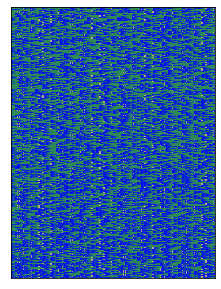

In [122]:
grid_height = 400  # Height of the grid
grid_width = 300  # Width of the grid

display_colored_squares(grid_height, grid_width)